*09 Oct 2024 : 21BAI1133 - Mukundh J*
#  Speech and Natural Language Processing Lab 11
- Compute Spectrogram of a speech signal using various frame sizes, frame rates, and sampling rates.
  + Analyze and report the differences.
  + Do at least three variations.
- Show and comment on the formants and coarticulation in your spectrogram.
  + Plot at least one example of coarticulation
- Plot the pitch track of the speech utterance.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp /content/drive/MyDrive/recording1.wav /content/

In [3]:
sampling_rate=16000

In [4]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

y, sr = librosa.load('/content/recording1.wav', sr=sampling_rate)

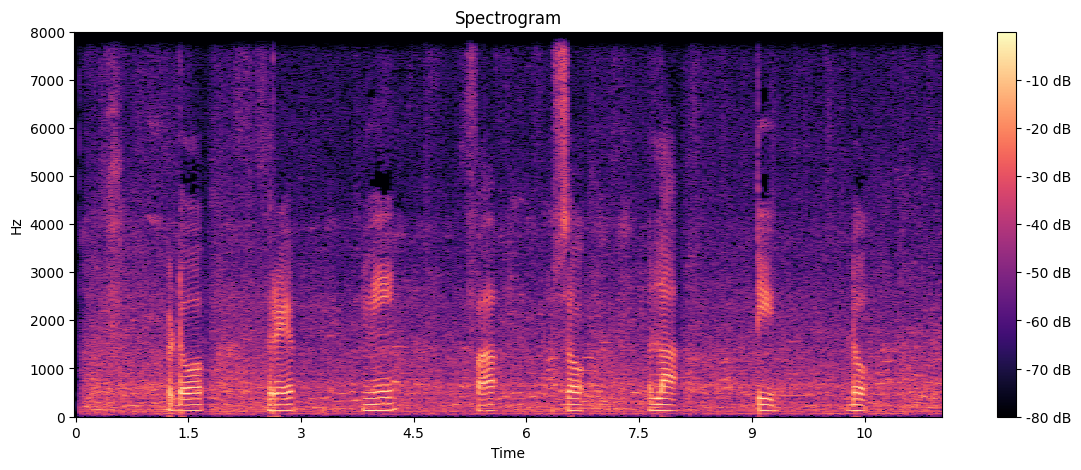

In [5]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(abs(D), ref=np.max)

# Display spectrogram
plt.figure(figsize=(14, 5))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

In [6]:
def compute_spectrogram(frame_size, hop_length, sr):
  y, sr = librosa.load('/content/recording1.wav', sr=sr)
  D = librosa.stft(y, n_fft=frame_size, hop_length=hop_length)
  S_db = librosa.amplitude_to_db(abs(D), ref=np.max)

  plt.figure(figsize=(14, 5))
  librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz')
  plt.colorbar(format='%+2.0f dB')
  plt.title(f'Spectrogram (Frame Size: {frame_size}, Hop Length: {hop_length}, Sampling Rate: {sr})')
  plt.show()

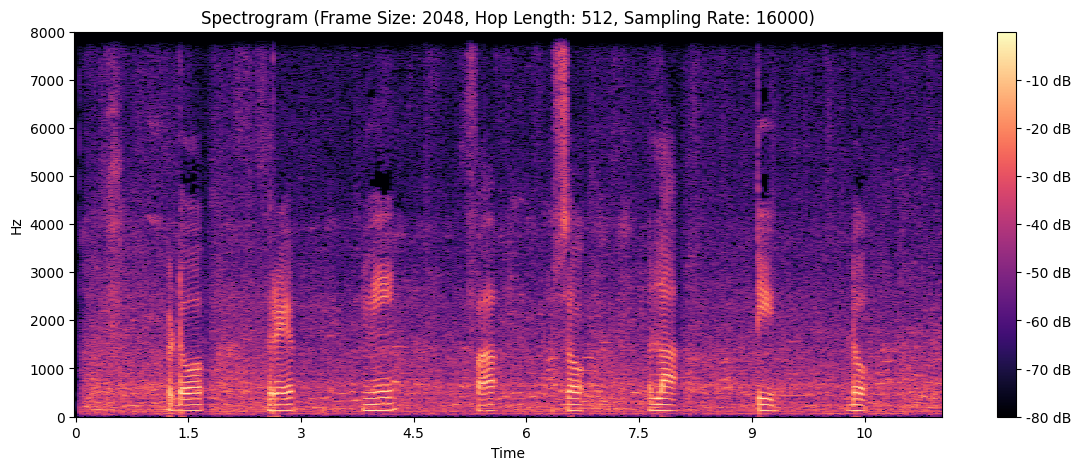

In [7]:
compute_spectrogram(2048, 512, 16000)

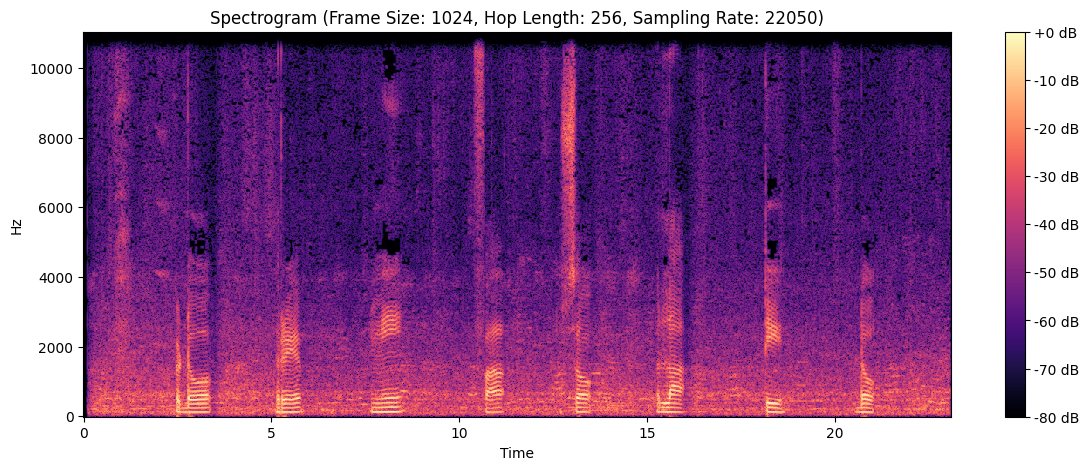

In [8]:
compute_spectrogram(1024, 256, 22050)

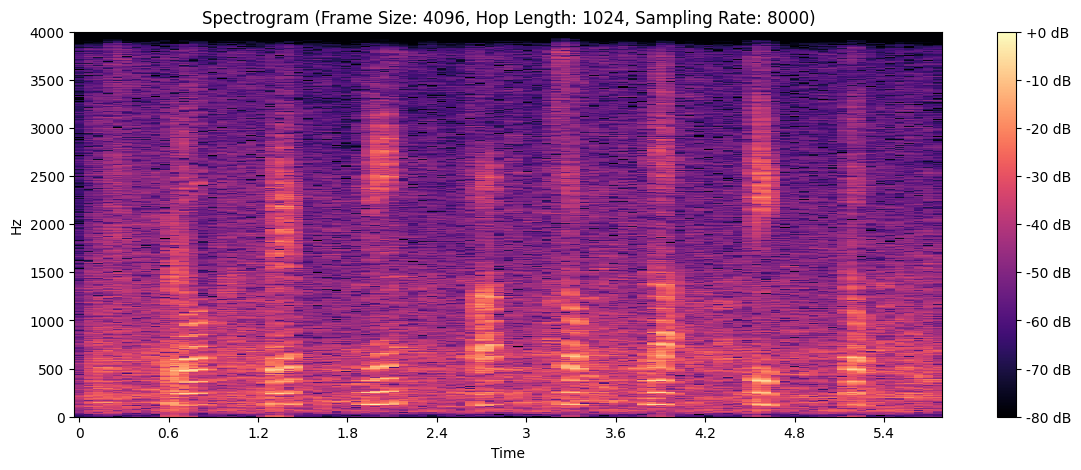

In [9]:
compute_spectrogram(4096, 1024, 8000)

In [10]:
d = {}

In [11]:
def add_to_dict(d,name, t):
  t1,t2=t
  d[f"{name}"]=(t1*sampling_rate,t2*sampling_rate) #(sample_number_first , sample_number_last)

In [12]:
add_to_dict(d,"do",(1.46,1.50))
add_to_dict(d,"re",(2.68,2.72))
add_to_dict(d,"mi",(4,4.04))
add_to_dict(d,"fa",(5.42,5.46))
add_to_dict(d,"sol",(6.58,6.64))
add_to_dict(d,"la",(7.80,7.84))
add_to_dict(d,"ti",(9.14,9.20))

In [13]:
d

{'do': (23360.0, 24000.0),
 're': (42880.0, 43520.0),
 'mi': (64000, 64640.0),
 'fa': (86720.0, 87360.0),
 'sol': (105280.0, 106240.0),
 'la': (124800.0, 125440.0),
 'ti': (146240.0, 147200.0)}

Formants are the resonant frequencies of the vocal tract.
In the spectrogram, they appear as dark bands (relatively high energy) in the frequency domain.

For example, in the above spectrogram, it can be observe how the formant frequencies are dynamically changing,indicating how the vocal tract changes with each phoneme. The phoneme 'D'  or 'id-'can be identified as shown

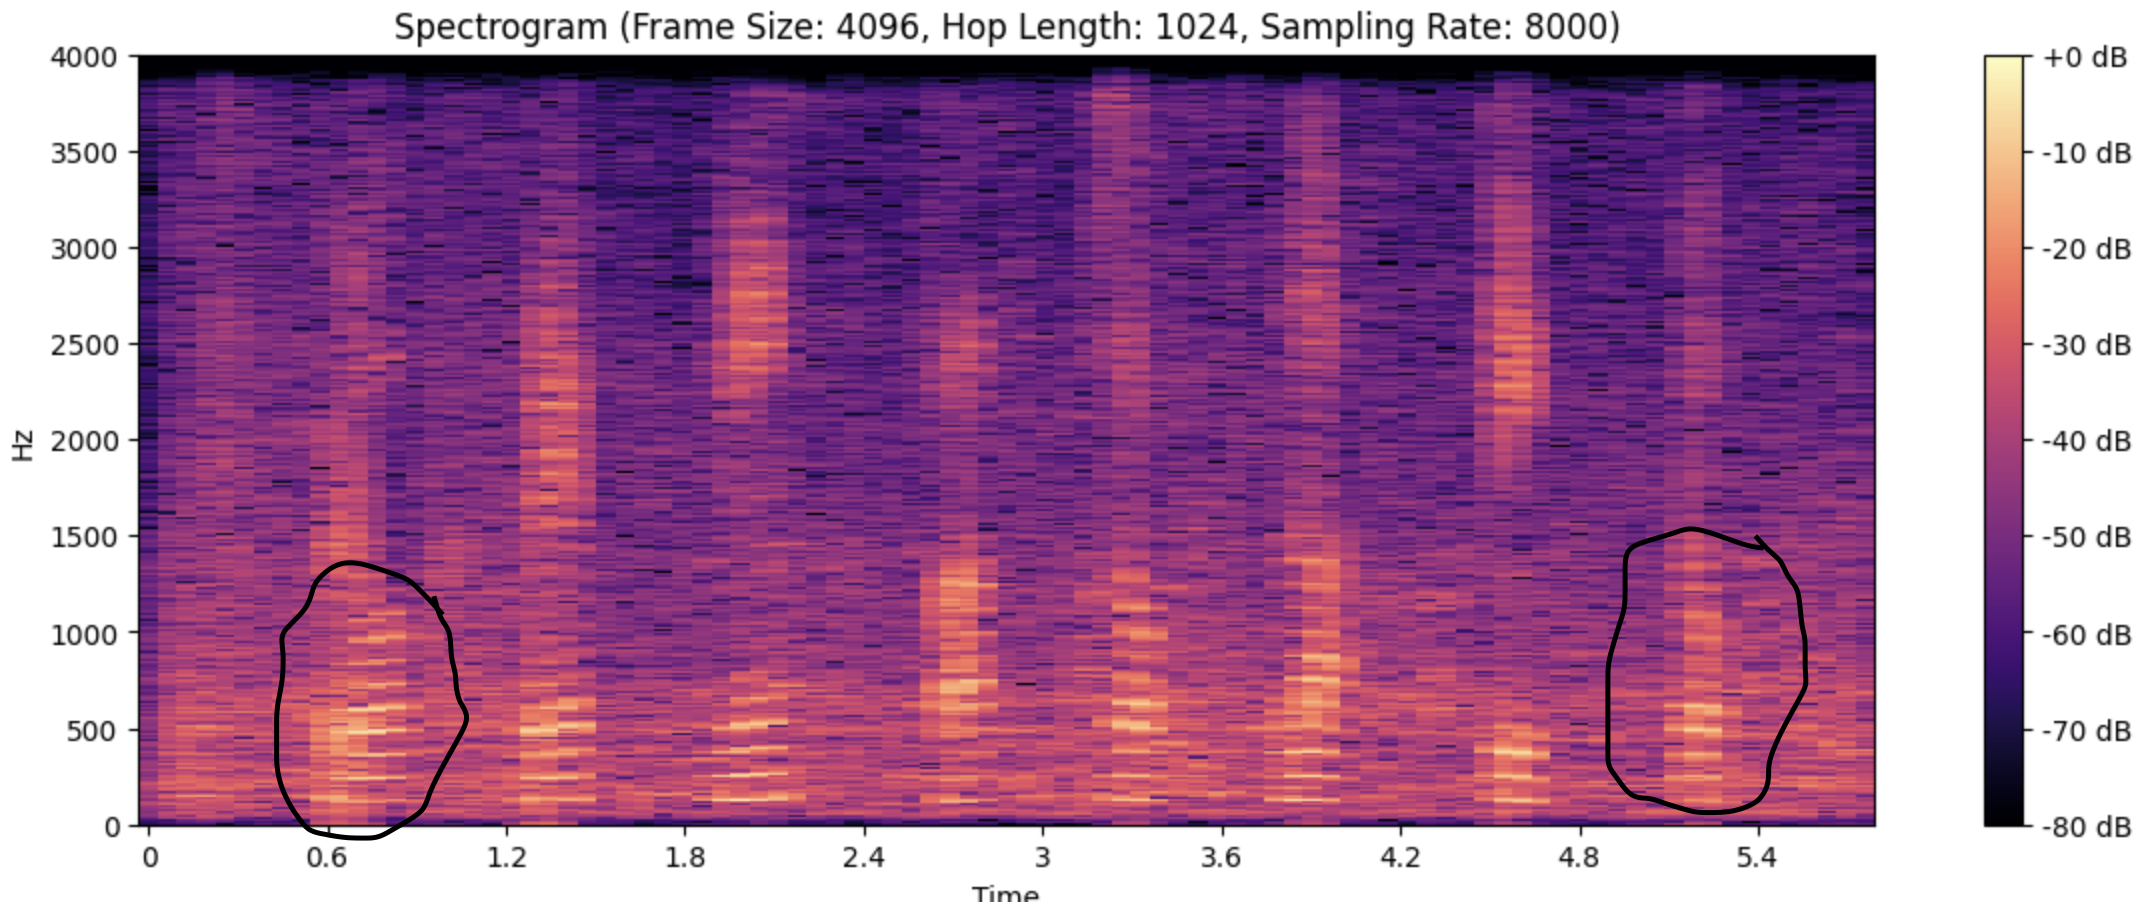

Coarticulation is the phenomenon where sounds influence each other in a sequence.
It's visible in the spectrogram as gradual transitions in formant frequencies.

An example here is for words 'mi' and 'ti' where the overlapping is clearly visible:
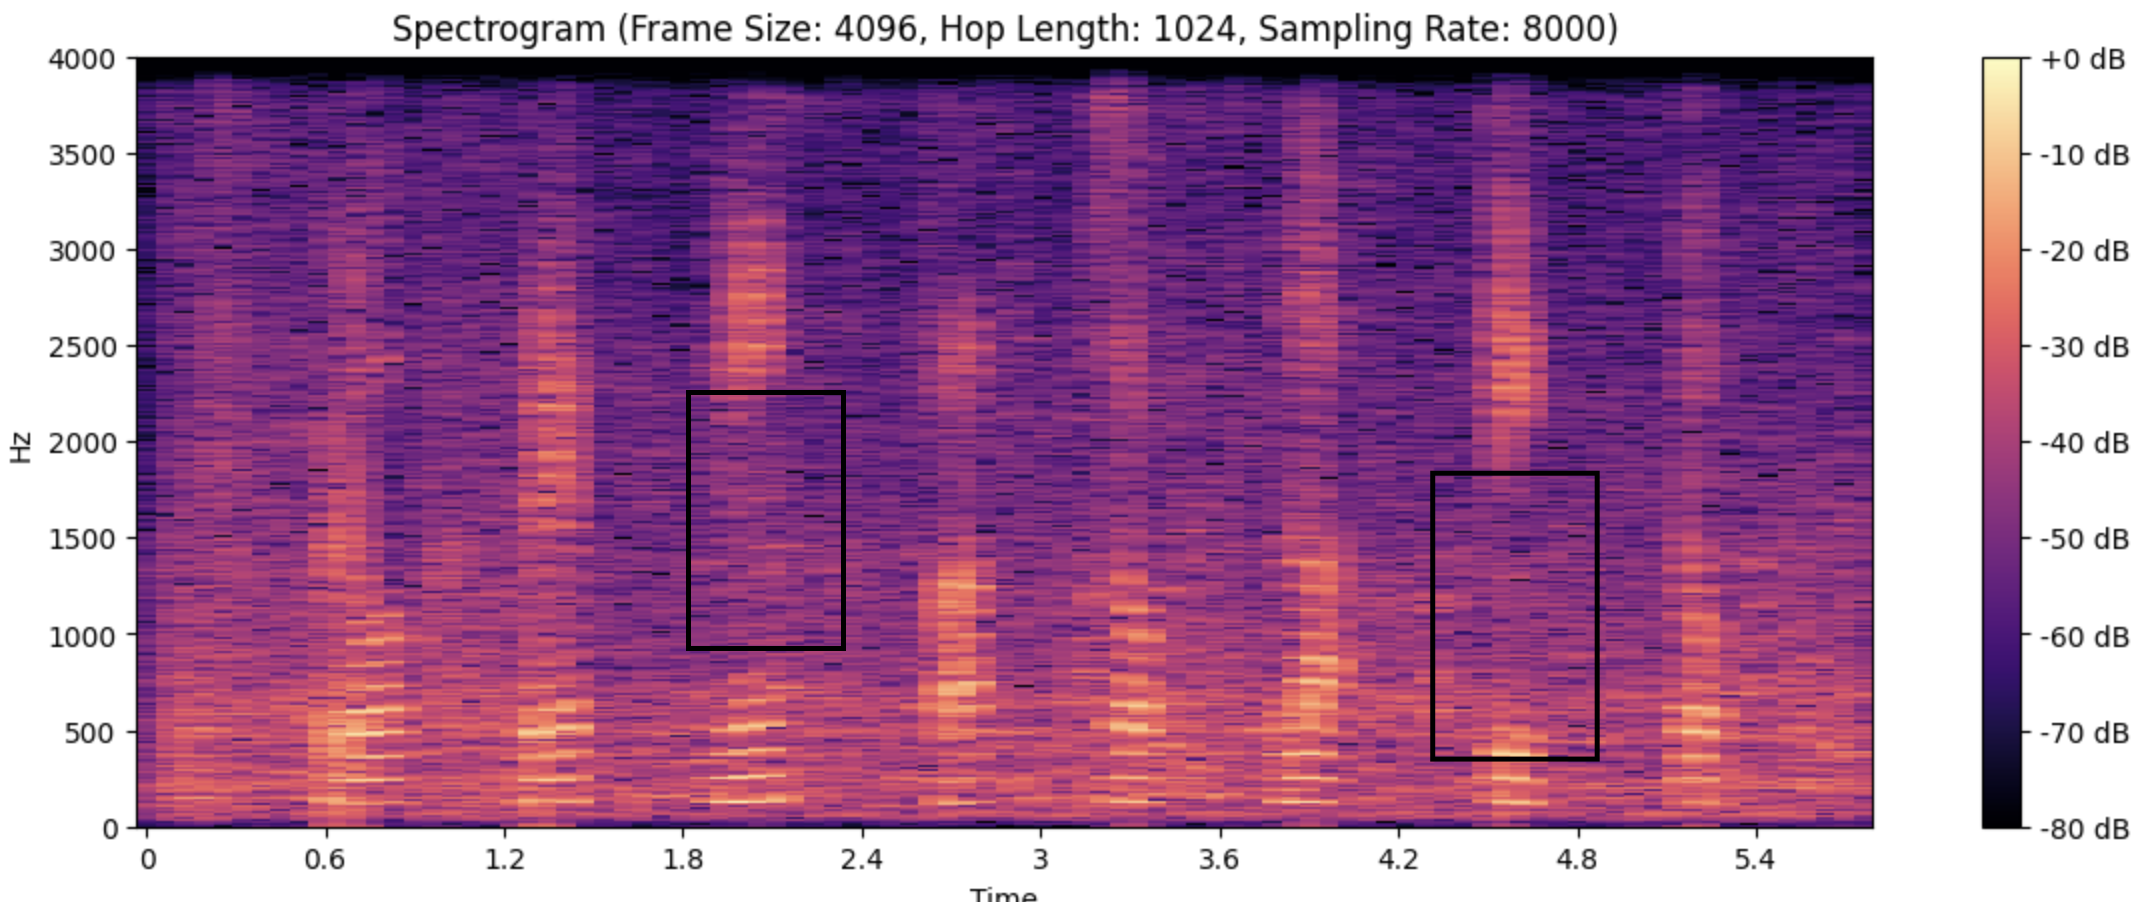

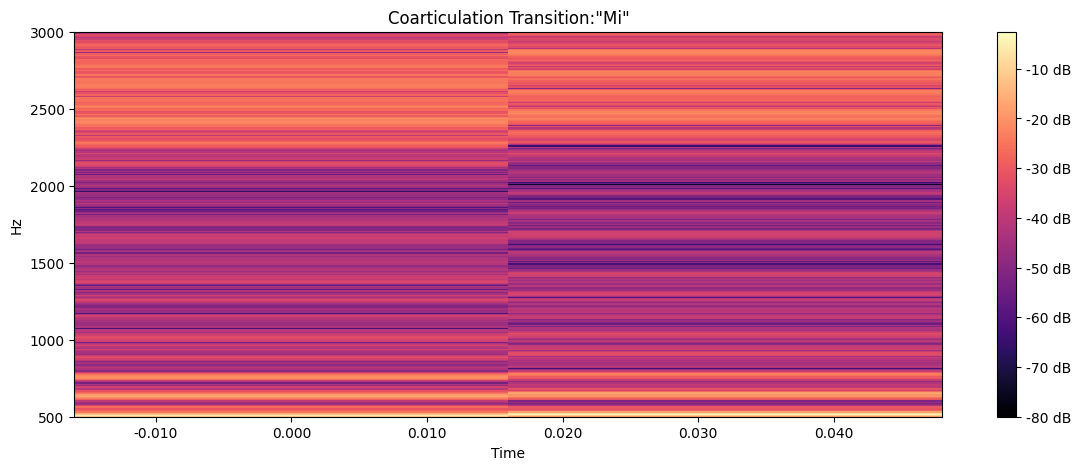

In [16]:
time_start = 4  # Start time for the transition
time_end = 4.04    # End time for the transition
frequency_start = 500  # Start frequency for the transition
frequency_end = 3000   # End frequency for the transition

plt.figure(figsize=(14, 5))
librosa.display.specshow(S_db[:, librosa.time_to_frames([time_start, time_end], sr=sr)], sr=sr, x_axis='time', y_axis='hz')
plt.ylim([frequency_start, frequency_end])
plt.colorbar(format='%+2.0f dB')
plt.title('Coarticulation Transition:"Mi"')
plt.show()

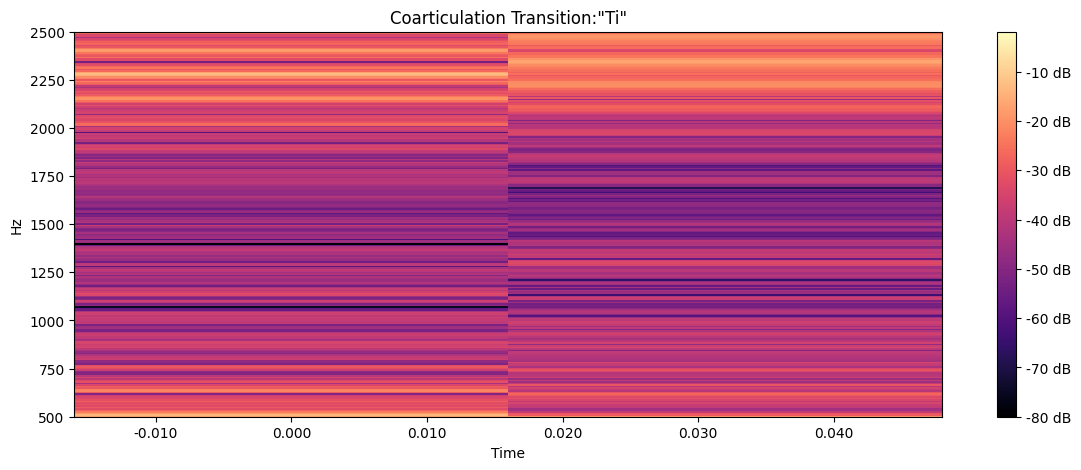

In [19]:
time_start = 9.14  # Start time for the transition
time_end = 9.20    # End time for the transition
frequency_start = 500  # Start frequency for the transition
frequency_end = 2500   # End frequency for the transition

plt.figure(figsize=(14, 5))
librosa.display.specshow(S_db[:, librosa.time_to_frames([time_start, time_end], sr=sr)], sr=sr, x_axis='time', y_axis='hz')
plt.ylim([frequency_start, frequency_end])
plt.colorbar(format='%+2.0f dB')
plt.title('Coarticulation Transition:"Ti"')
plt.show()

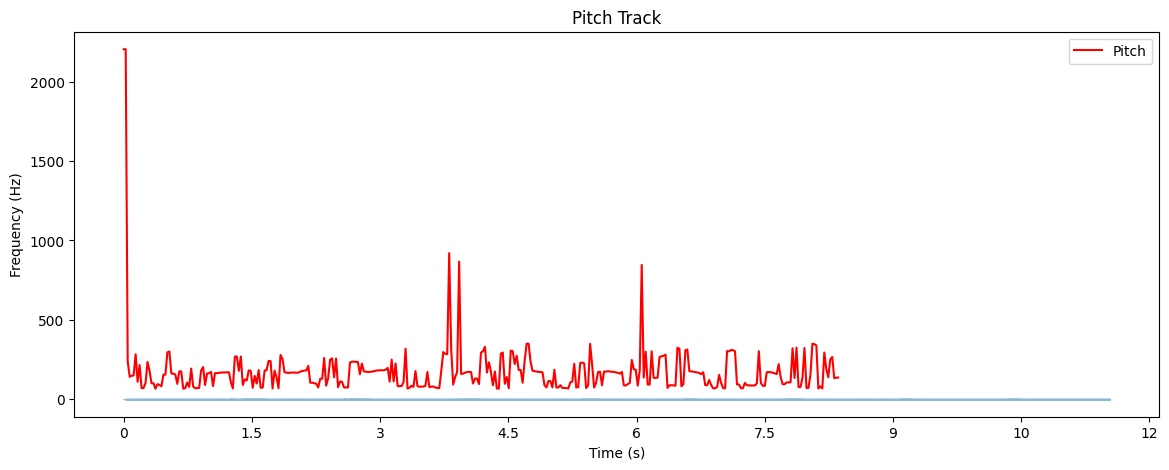

In [20]:
pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
pitch = librosa.yin(y, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))

plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr, alpha=0.5)
plt.plot(librosa.times_like(pitch), pitch, color='r', label='Pitch')
plt.title('Pitch Track')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.legend()
plt.show()